In [1]:
import pandas as pd

In [2]:
dataset1 = pd.read_csv('Books.csv', encoding='latin1',low_memory=False)
dataset2 = pd.read_csv('Ratings.csv', encoding='latin1',low_memory=False)
dataset3 = pd.read_csv('Users.csv', encoding='latin1',low_memory=False)


In [3]:
print(dataset1.columns)  # Columns in Books
print(dataset2.columns)  # Columns in Ratings
print(dataset3.columns)  # Columns in Users


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [4]:
# Merge Books with Ratings on 'ISBN'
merged_books_ratings = pd.merge(dataset1, dataset2, on='ISBN')

# Merge the result with Users on 'User-ID'
full_merged_data = pd.merge(merged_books_ratings, dataset3, on='User-ID')

# Display the first few rows of the merged dataset
print(full_merged_data.head())


         ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
4    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                

The code merges three datasets: first, Books and Ratings on 'ISBN', then merges the result with Users on 'User-ID'. Finally, it prints the first few rows of the fully merged dataset.


In [5]:
full_merged_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [6]:
dataset1['ISBN'] = dataset1['ISBN'].astype(str)
dataset2['ISBN'] = dataset2['ISBN'].astype(str)
dataset2['User-ID'] = dataset2['User-ID'].astype(int)
dataset3['User-ID'] = dataset3['User-ID'].astype(int)

The code converts 'ISBN' in dataset1 and dataset2 to strings, and 'User-ID' in dataset2 and dataset3 to integers for consistent data types.











In [7]:
print(full_merged_data.isnull().sum())
#This code prints the count of missing (null) values in each column of full_merged_data.

ISBN                        0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
dtype: int64


In [8]:

# Fill missing image URLs with a placeholder
placeholder_url = 'https://example.com/placeholder.jpg'
full_merged_data['Image-URL-M'].fillna(placeholder_url, inplace=True)
full_merged_data['Image-URL-L'].fillna(placeholder_url, inplace=True)

# Fill missing Age values with the median
median_age = full_merged_data['Age'].median()
full_merged_data['Age'].fillna(median_age, inplace=True)

# Verify the result
print(full_merged_data.isnull().sum())


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1994163230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_merged_data['Image-URL-M'].fillna(placeholder_url, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1994163230.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64


The code fills missing image URLs with a placeholder and missing ages with the median age. It then verifies the result by printing the count of remaining null values in each column.

In [9]:
# Fill missing values in 'Book-Author' and 'Publisher' with a placeholder
full_merged_data['Book-Author'].fillna('Unknown Author', inplace=True)
full_merged_data['Publisher'].fillna('Unknown Publisher', inplace=True)

# Fill missing 'Location' with a placeholder
full_merged_data['Location'].fillna('Unknown Location', inplace=True)

# Verify that missing values have been handled
print(full_merged_data.isnull().sum())



C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1168356120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_merged_data['Book-Author'].fillna('Unknown Author', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\1168356120.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64


The code fills missing values in 'Book-Author', 'Publisher', and 'Location' with placeholders and then checks for any remaining null values.
This output shows that there are no missing values in any of the columns of the full_merged_data dataset after handling nulls.

In [10]:

# Find the total number of duplicated rows
num_duplicates = full_merged_data.duplicated().sum()

# Display the result
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


There are no duplicate rows in the dataset.

In [11]:
full_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031136 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031136 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  1031136 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


The dataset has 1,031,136 entries and 12 columns, with no missing values. Key data types include strings for book details, integers for `User-ID` and `Book-Rating`, and floats for `Age`.

In [12]:
full_merged_data.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,3.675161e+01
std,8.052466e+04,3.854157e+00,1.209699e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,3.100000e+01
50%,1.412100e+05,0.000000e+00,3.500000e+01
75%,2.114260e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,2.440000e+02


The `full_merged_data.describe()` function provides summary statistics for numerical columns in the dataset, such as count, mean, standard deviation, minimum, maximum, and quartile values (25%, 50%, 75%) for columns like `User-ID`, `Book-Rating`, and `Age`.
The summary statistics show:

User-ID: Ranges from 2 to 278,854, with a mean of 140,594.
Book-Rating: Ranges from 0 to 10, with a mean of approximately 2.84.
Age: Ranges from 0 to 244, with a mean of about 36.75 years.

In [13]:
#checking unique value
full_merged_data.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       118
Publisher               16730
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269840
User-ID                 92106
Book-Rating                11
Location                22480
Age                       141
dtype: int64

This output shows the number of unique values for each column in the dataset.

In [14]:

# Assuming 'full_merged_data' is your merged DataFrame
outlier_results = {}

# Identify numeric columns
numeric_cols = full_merged_data.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column to find outliers
for column in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = full_merged_data[column].quantile(0.25)
    Q3 = full_merged_data[column].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = full_merged_data[(full_merged_data[column] < lower_bound) |
                                 (full_merged_data[column] > upper_bound)]

    # Store the results in the dictionary
    outlier_results[column] = outliers

# Display outliers for each column
for column, outliers in outlier_results.items():
    print(f"Outliers for {column}:")
    print(outliers)


Outliers for User-ID:
Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L, User-ID, Book-Rating, Location, Age]
Index: []
Outliers for Book-Rating:
Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L, User-ID, Book-Rating, Location, Age]
Index: []
Outliers for Age:
               ISBN                                         Book-Title  \
13       0002005018                                       Clara Callan   
16       0060973129                               Decision in Normandy   
20       0374157065  Flu: The Story of the Great Influenza Pandemic...   
49       0399135782                             The Kitchen God's Wife   
76       0771074670                        Nights Below Station Street   
...             ...                                                ...   
1031104  9813056398      Broken Mirror : True Stories About Drug A

This code identifies outliers in the numeric columns of `full_merged_data` using the Interquartile Range (IQR) method. It calculates the 25th (Q1) and 75th (Q3) percentiles, computes the IQR, and determines lower and upper bounds to identify outliers. The results are stored in a dictionary and printed for each numeric column.

In [15]:
#Store Outliers in a Single DataFrame
all_outliers = pd.concat(outlier_results.values(), keys=outlier_results.keys())
print("All Outliers:")
print(all_outliers)


All Outliers:
                   ISBN                                         Book-Title  \
Age 13       0002005018                                       Clara Callan   
    16       0060973129                               Decision in Normandy   
    20       0374157065  Flu: The Story of the Great Influenza Pandemic...   
    49       0399135782                             The Kitchen God's Wife   
    76       0771074670                        Nights Below Station Street   
...                 ...                                                ...   
    1031104  9813056398      Broken Mirror : True Stories About Drug Abuse   
    1031106  0878576568              Biopotency: A Guide in Sexual Success   
    1031120  3257217323                       Schmatz. Oder Die Sackgasse.   
    1031121  3596156904                                              Amok.   
    1031132  0525447644                            From One to One Hundred   

                        Book-Author Year-Of-Publi

Each outlier row indicates an unusually high or low value based on the Interquartile Range (IQR) method.

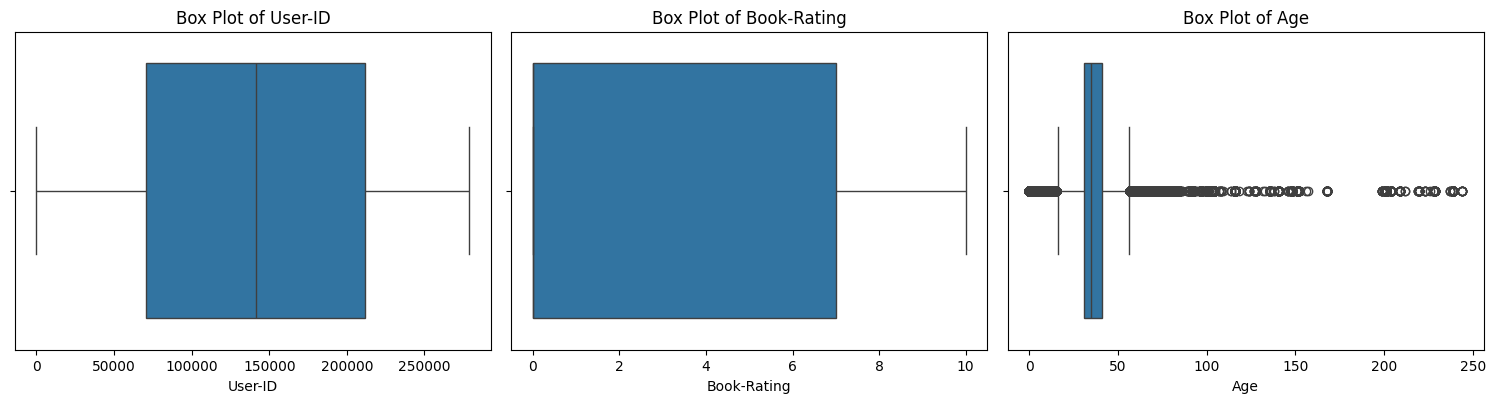

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=full_merged_data[column], showfliers=True)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    # Calculate lower and upper limits within the loop
    Q1 = full_merged_data[column].quantile(0.25)
    Q3 = full_merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR



plt.tight_layout()
plt.show()

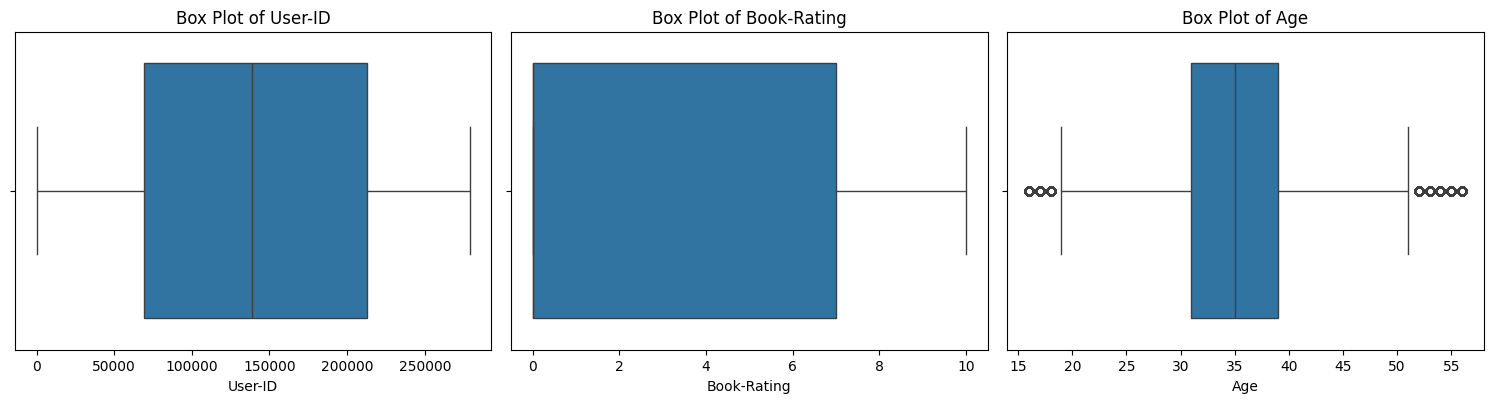

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = full_merged_data

# Assuming you have a DataFrame named 'df' with columns 'User-ID', 'Book-Rating', and 'Age'

# Calculate the IQR for each column
q1 = df[['User-ID', 'Book-Rating', 'Age']].quantile(0.25)
q3 = df[['User-ID', 'Book-Rating', 'Age']].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
df_outliers = df[(df[['User-ID', 'Book-Rating', 'Age']] < lower_bound) | (df[['User-ID', 'Book-Rating', 'Age']] > upper_bound)]

# Handle outliers (e.g., remove or replace)
df = df[~df.isin(df_outliers)].dropna()  # Remove outliers

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column], showfliers=True)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
plt.show()

From the plots, we can observe:

User-ID: The distribution is skewed to the right, with a median around 150,000 and a few outliers on the higher end.
Book-Rating: The distribution is relatively symmetrical, with a median around 7. There are no outliers.
Age: The distribution is skewed to the right, with a median around 30 and several outliers on the higher end.

In [18]:
# Display the shape of the DataFrame after filtering
print(f'Shape of DataFrame before removing Age outliers: {full_merged_data.shape}')
print(f'Shape of DataFrame after removing Age outliers: {df.shape}')

#Display the first few rows of the filtered DataFrame
print(df.head())


Shape of DataFrame before removing Age outliers: (1031136, 12)
Shape of DataFrame after removing Age outliers: (959226, 12)
         ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   
2  0002005018         Clara Callan  Richard Bruce Wright                2001   
3  0002005018         Clara Callan  Richard Bruce Wright                2001   
4  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
2    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
3    HarperFlamingo Canada  http://images.amazon.com/images/P/000200501

In [19]:
df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

This output shows that there are no missing values in any of the columns of the dataset

**visualization**

1. Distribution of Ratings

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\457624593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=df, palette='coolwarm')


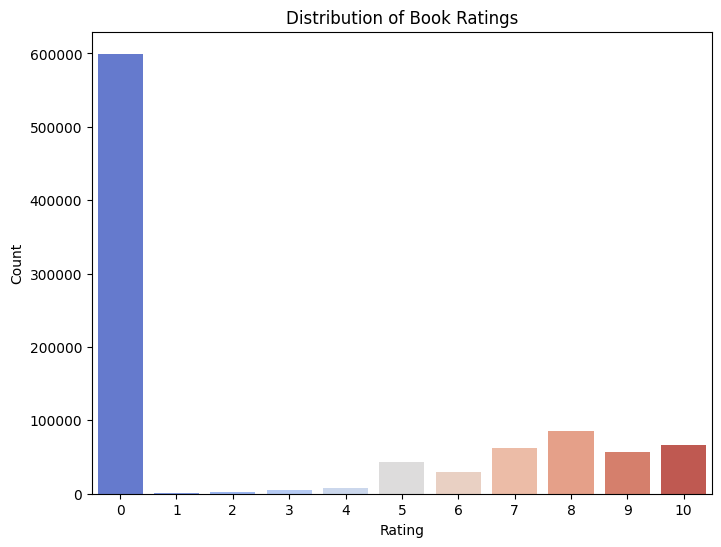

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=df, palette='coolwarm')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Ratings by Age Group

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\4274693676.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_age = df.groupby(age_groups)['Book-Rating'].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\4274693676.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_age.index, y=avg_rating_by_age.values, palette='cubehelix')


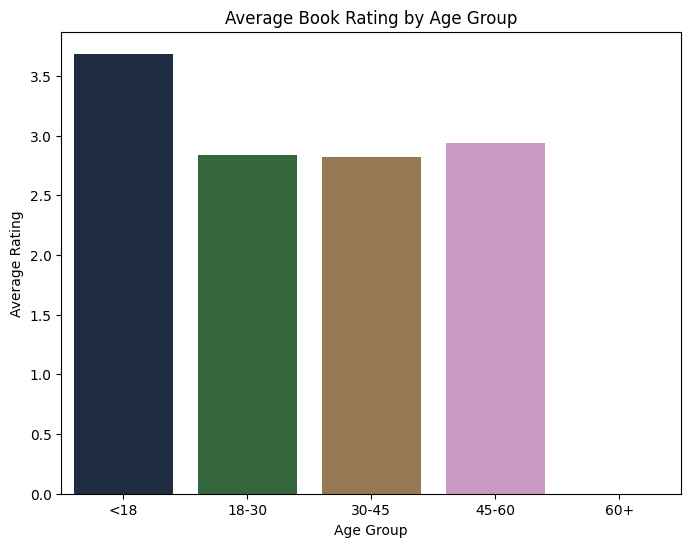

In [21]:
# Define age groups
age_groups = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '30-45', '45-60', '60+'])

# Average rating per age group
avg_rating_by_age = df.groupby(age_groups)['Book-Rating'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_age.index, y=avg_rating_by_age.values, palette='cubehelix')
plt.title('Average Book Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\2569193548.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_books.values, y=top_rated_books.index, palette='magma')


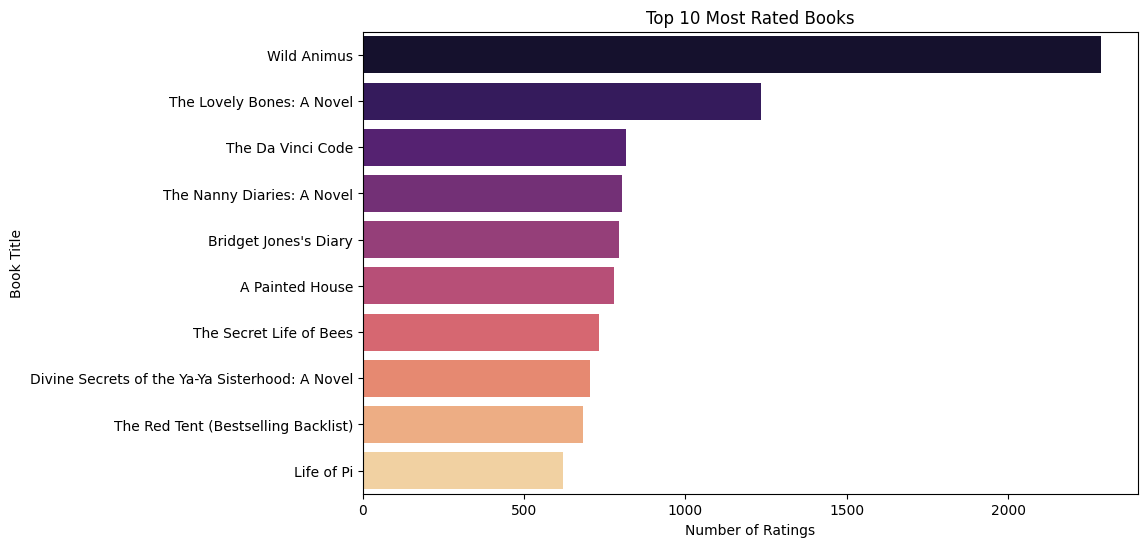

In [22]:
# Top 10 most rated books
top_rated_books = df['Book-Title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_books.values, y=top_rated_books.index, palette='magma')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()



Top Authors by Number of Books Rated


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13472\3636061530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='plasma')


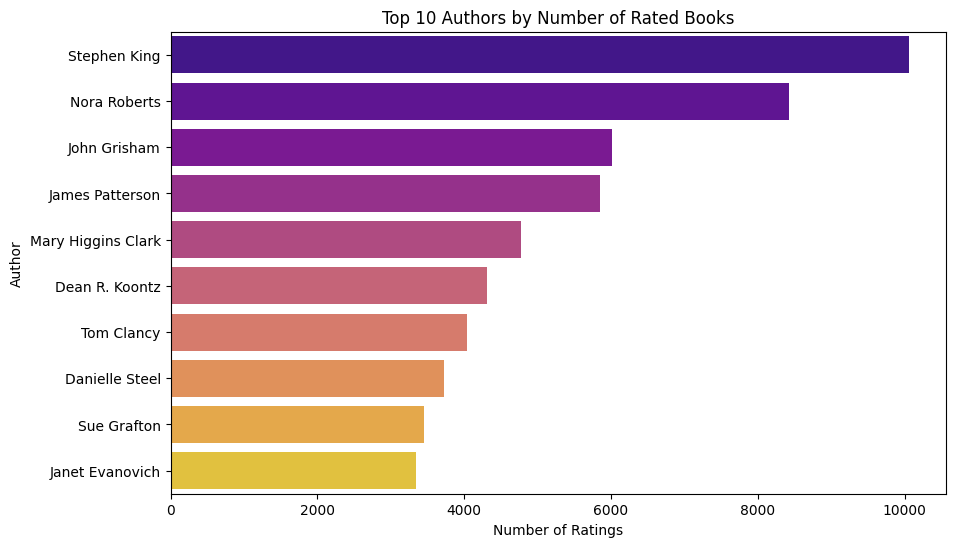

In [23]:
# Top authors by number of rated books
top_authors = full_merged_data['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='plasma')
plt.title('Top 10 Authors by Number of Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Author')
plt.show()


model building

**popularity based recommendation**

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
num_ratings_df = df.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)
num_ratings_df.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,"Ask Lily (Young Women of Faith: Lily Series, ...",1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


This code groups the dataset by `Book-Title`, counts the number of ratings for each book, and resets the index. It then renames the count column to `num_ratings` and displays the first few rows of the resulting DataFrame.

In [26]:
avg_rating_df = df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)
avg_rating_df.head()

,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00


This code groups the dataset by `Book-Title`, calculates the average rating for each book, and resets the index. It then renames the rating column to `Average-Rating` and displays the first few rows of the resulting DataFrame.

In [27]:
popular_df = num_ratings_df.merge(avg_rating_df, on='Book-Title')
popular_df.head()

,Book-Title,num_ratings,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.00


This code merges the `num_ratings_df` (which contains the number of ratings) with the `avg_rating_df` (which contains the average ratings) on `Book-Title`, creating a new DataFrame `popular_df`. It then displays the first few rows of this merged DataFrame.

In [28]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('Average-Rating', ascending=False).head(50)

This code filters the `popular_df` DataFrame to include only books with at least 250 ratings, sorts them by `Average-Rating` in descending order, and selects the top 50 books.

In [29]:
popular_df = popular_df.merge(df, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'Average-Rating']]

This code merges the `popular_df` DataFrame with the original `df` on `Book-Title`, removes duplicate entries by `Book-Title`, and selects only the specified columns: `Book-Title`, `Book-Author`, `Image-URL-M`, `num_ratings`, and `Average-Rating`.

In [30]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,Average-Rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,356,5.775281
356,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,395,5.724051
751,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,315,5.628571
1066,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,258,5.550388
1324,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,513,5.163743
1837,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,266,5.033835
2103,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,348,4.977011
2451,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,523,4.871893
2974,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,484,4.696281
3458,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,817,4.625459


**collabarative filtering based on recommendatiopn system**

In [31]:
x = df.groupby('User-ID').count()['Book-Rating'] > 200
experienced_users = x[x].index # Create a boolean mask to filter users with more than 200 ratings.


This code identifies users in the dataset who have provided more than 200 ratings. It creates a boolean mask and extracts the indices of these users, storing them in the `experienced_users` variable.

In [32]:
filtered_rating = df[df['User-ID'].isin(experienced_users)]

This code filters the original DataFrame `df` to include only the ratings from users identified as `experienced_users`, creating a new DataFrame `filtered_rating`.

In [33]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

This code identifies books that have received at least 50 ratings from the `filtered_rating` DataFrame. It creates a boolean mask and extracts the indices of these books, storing them in the `famous_books` variable.

In [34]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

This code filters the `filtered_rating` DataFrame to include only the ratings for books identified as `famous_books`, resulting in the `final_ratings` DataFrame.

In [35]:
pt = final_ratings.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

This code creates a pivot table from the `final_ratings` DataFrame

In [36]:
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This code fills missing values in the pivot table `pt` with 0 and displays the updated table.

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
similarity_scores = cosine_similarity(pt)

This code calculates the cosine similarity scores between the rows of the pivot table `pt`, resulting in a matrix of similarity scores for the books based on their ratings.

In [39]:
similarity_scores.shape

(625, 625)

In [40]:
import numpy as np

def recommend(book_name, pt, df):

  # index fetch
  index = np.where(pt.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

  data = []
  for i in similar_items:
      item = []
      # Changed pt['Book-Title'] to df['Book-Title'] for filtering
      temp_df = df[df['Book-Title'] == pt.index[i[0]]]
      item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
      item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
      item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

      data.append(item)

  return data

This function, `recommend`, takes a book name, a pivot table (`pt`), and a DataFrame (`df`) as inputs. It finds the index of the specified book, retrieves the top 5 similar books based on cosine similarity scores, and collects the title, author, and medium image URL for each similar book. The results are returned as a list of lists containing this information.

In [41]:
# Assuming 'pt' and 'df' are defined and hold the appropriate data
recommendations = recommend("1st to Die: A Novel", pt, df)
print(recommendations)

[['Along Came a Spider (Alex Cross Novels)', 'James Patterson', 'http://images.amazon.com/images/P/0446364193.01.MZZZZZZZ.jpg'], ['Roses Are Red (Alex Cross Novels)', 'James Patterson', 'http://images.amazon.com/images/P/0446605484.01.MZZZZZZZ.jpg'], ['Pop Goes the Weasel', 'James Patterson', 'http://images.amazon.com/images/P/0316693286.01.MZZZZZZZ.jpg'], ['The Summons', 'John Grisham', 'http://images.amazon.com/images/P/0440241073.01.MZZZZZZZ.jpg'], ['Violets Are Blue', 'James Patterson', 'http://images.amazon.com/images/P/0446611212.01.MZZZZZZZ.jpg']]


This code calls the `recommend` function with the book title "1st to Die: A Novel," the pivot table `pt`, and the DataFrame `df` to generate recommendations. It then prints the list of recommended books, including their titles, authors, and image URLs.

In [42]:
# Assuming 'pt' and 'df' are defined and hold the appropriate data
recommendations = recommend("1984", pt, df)
print(recommendations)

[['Animal Farm', 'George Orwell', 'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'], ["The Handmaid's Tale", 'Margaret Atwood', 'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'], ['Brave New World', 'Aldous Huxley', 'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'], ['The Vampire Lestat (Vampire Chronicles, Book II)', 'ANNE RICE', 'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'], ['Fahrenheit 451', 'Ray Bradbury', 'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg']]


knn based colabarative filtering

In [43]:
from sklearn.neighbors import NearestNeighbors

# Create KNN model with cosine similarity
knn = NearestNeighbors(n_neighbors=20, metric='cosine')

# Fit model to the user-item matrix
knn.fit(pt)  # Assuming 'pt' is the item-user matrix (column: users, rows: items/books)

# Check the available indices in 'pt' (User-IDs)
print(pt.index)

# Select a specific user by User-ID (example: first user in the DataFrame)
user_id = pt.index[0]  # For example, pick the first user
user_ratings = pt.loc[user_id].values.reshape(1, -1)  # Get the user's ratings, reshape for KNN

# Get K nearest neighbors (similar users)
recommendations = knn.kneighbors(user_ratings, return_distance=False)

# Print recommendations (these are the indices of similar users)
print(recommendations)

# Optionally, map the recommendations back to the user IDs
similar_user_ids = pt.index[recommendations.flatten()]
print("Similar users:", similar_user_ids)


Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=625)
[[  0  43 475  73 559 152 481 435 484 453 458 426 550 524 482 273 570  56
  471 548]]
Similar users: Index(['1984', 'Animal Farm', 'The Handmaid's Tale', 'Brave New World',
       'The Vampire Lestat (Vampire Chronicles, Book II)', 'Fahrenheit 451',
       'The Hours : A Novel', 'The Catcher in the Rye',
       'The Hundred Secret Senses',
       'The Drawing of the Three (The Dark Tow

This code initializes a K-Nearest Neighbors (KNN) model using cosine similarity and fits it to the item-user matrix `pt`. It prints the available User-IDs, selects the first user to retrieve their ratings, and finds the 20 nearest neighbors (similar users). Finally, it prints the indices of the similar users and maps them back to their User-IDs.

**deploy the model**

In [44]:
popular_df.columns

Index(['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings',
       'Average-Rating'],
      dtype='object')

In [45]:
import pickle
pickle. dump(popular_df, open('popular. pkl', 'wb'))


This code saves the `popular_df` DataFrame to a pickle file named `popular.pkl`. It also removes duplicate entries in the `df` DataFrame based on the `Book-Title` column, ensuring only unique book titles remain.

In [46]:
df. drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35.0
15,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",35.0
18,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",35.0
29,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031129,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,276077,0,"badalona, catalonia, spain",26.0
1031130,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,276313,5,"livermore, california, usa",36.0
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0,"hopewell junction, new york, usa",55.0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0,"hopewell junction, new york, usa",55.0


In [47]:

pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

This code saves the `pt`, `df`, and `similarity_scores` objects to pickle files named `pt.pkl`, `df.pkl`, and `similarity_scores.pkl`, respectively, for future use.

In [48]:
%pip install streamlit -q

Note: you may need to restart the kernel to use updated packages.


This command installs the Streamlit library in Python silently (without showing installation logs) using pip, enabling the creation of interactive web applications for data visualization.

In [49]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.


This command installs the `wget` library in Python using pip, allowing users to download files from the internet directly within Python scripts.

In [50]:
! wget -q -O - ipv4.icanhazip.com

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [51]:
! streamlit run app.py & npx localtunnel --port 8501


^C
